In [25]:
#Problem 1b
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import skimage.io
import skimage.exposure
import skimage.measure
%matplotlib inline

In [231]:
N_NS = 4.6 * 10 ** 6
e = 2.718281828459045
def FC(R, deltaEr):
    return 1 / (1 + (R / N_NS) * e ** (- deltaEr))

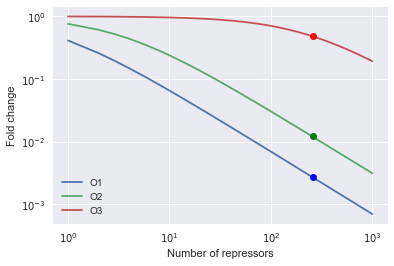

In [408]:
steps = np.arange(1,1001,1)
O1_vals = np.zeros(1000)
O2_vals = np.zeros(1000)
O3_vals = np.zeros(1000)

for i in range(1, 1001):
    O1_vals[i - 1] = FC(i, -15.7)
    O2_vals[i - 1] = FC(i, -14.2)
    O3_vals[i - 1] = FC(i, -9.87)
    
plt.plot(steps, O1_vals, '-', label='O1')
plt.plot(steps, O2_vals, '-', label='O2')
plt.plot(steps, O3_vals, '-', label='O3')
plt.plot(260, 2.77 * 10 ** -3, 'o', color = 'blue')
plt.plot(260, 1.24 * 10 ** -2, 'o', color = 'green')
plt.plot(260, .477, 'o', color = 'red')
plt.xlabel('Number of repressors')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Fold change')
plt.legend()


In [55]:
#Problem 2a
gray = plt.cm.Greys_r
def normIm(image):
    norm = (image - image.min()) / (image.max() - image.min())
    return norm

In [409]:
def segment_im(phase_im, ip_dist=.160, area_bounds=(1,4), phase_thresh=.3, show_mask=False):
    phase_norm = normIm(phase_im)
    thresh_im = phase_norm < phase_thresh
    phase_copy = np.copy(phase_norm)


    
    im_lab, num_obj = skimage.measure.label(thresh_im, return_num=True)
    
    approved_cells = np.zeros_like(thresh_im)
    for i in range(num_obj):
        cell = (im_lab == i + 1)
        cell_area = np.sum(cell) * ip_dist**2 
        if (cell_area > 1.0) & (cell_area < 4.0):
            approved_cells += cell  
    approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)
    
    bar_length = int(10 / ip_dist)
    phase_norm[10:20, 10:10 + bar_length] = 1.0
    phase_copy[10:20, 10:10 + bar_length] = 1.0
    phase_copy[approved_cells] = 1.0
    
    if(show_mask == True):
        mask_rgb = np.dstack((phase_norm, phase_copy, phase_copy))
        plt.imshow(mask_rgb)
    else:
        plt.imshow(thresh_im)

In [410]:
im1 = skimage.io.imread('desktop/bi1/lacI_titration/O1_delta_phase_pos_01.tif')
im2 = skimage.io.imread('desktop/bi1/lacI_titration/O2_delta_phase_pos_01.tif')
im3 = skimage.io.imread('desktop/bi1/lacI_titration/O3_auto_phase_pos_01.tif')
im4 = skimage.io.imread('desktop/bi1/lacI_titration/O1_R60_phase_pos_01.tif')

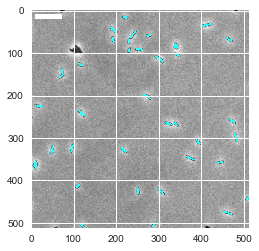

In [411]:
segment_im(im1, show_mask=True)

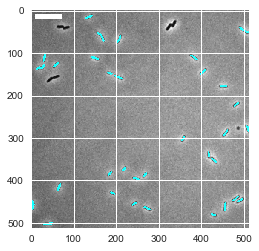

In [412]:
segment_im(im2, show_mask=True)

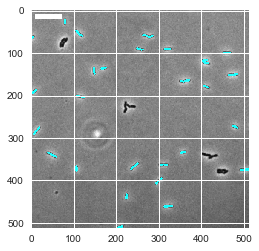

In [413]:
segment_im(im3, show_mask=True)

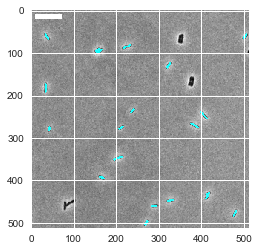

In [414]:
segment_im(im4, show_mask=True)

In [415]:
#Problem 2b
ip_dist = 0.160
def segment_im2(phase_im, ip_dist=.160, area_bounds=(1,4), phase_thresh=.3, show_mask=False):
    phase_norm = normIm(phase_im)
    thresh_im = phase_norm < phase_thresh
    phase_copy = np.copy(phase_norm)


    
    im_lab, num_obj = skimage.measure.label(thresh_im, return_num=True)
    
    approved_cells = np.zeros_like(thresh_im)
    for i in range(num_obj):
        cell = (im_lab == i + 1)
        cell_area = np.sum(cell) * ip_dist**2 
        if (cell_area > 1.0) & (cell_area < 4.0):
            approved_cells += cell  
    approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)
    
    bar_length = int(10 / ip_dist)
    phase_norm[10:20, 10:10 + bar_length] = 1.0
    phase_copy[10:20, 10:10 + bar_length] = 1.0
    phase_copy[approved_cells] = 1.0
    
    if(show_mask == True):
        mask_rgb = np.dstack((phase_norm, phase_copy, phase_copy))
        return mask_rgb
    else:
        return thresh_im
    
def extract_intensities(phase_im, fluor_im):
    thresh_im = segment_im2(phase_im)
    im_lab, num_obj = skimage.measure.label(thresh_im, return_num=True)
    
    approved_cells = np.zeros_like(thresh_im)
    for i in range(num_obj):
        cell = (im_lab == i + 1)
        cell_area = np.sum(cell) * ip_dist**2 
        if (cell_area > 1.0) & (cell_area < 4.0):
            approved_cells += cell  
    approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)
    
    tot_ints = np.zeros(num_obj) 
    cell_areas = np.zeros(num_obj)
    for i in range(num_obj): 
        cell = (approved_lab == i + 1)
        cell_areas[i] = np.sum(cell) * ip_dist**2
        int_im = cell * fluor_im
        tot_ints[i] = np.sum(int_im)
    return tot_ints

In [416]:
im5 = skimage.io.imread('desktop/bi1/lacI_titration/O1_delta_yfp_pos_01.tif')
im6 = skimage.io.imread('desktop/bi1/lacI_titration/O2_delta_yfp_pos_01.tif')
im7 = skimage.io.imread('desktop/bi1/lacI_titration/O3_auto_yfp_pos_01.tif')
im8 = skimage.io.imread('desktop/bi1/lacI_titration/O1_R60_yfp_pos_01.tif')
extract_intensities(im1, im5)

array([ 149278.,  262069.,  146413.,  197307.,  205973.,  145619.,
        218029.,  170085.,  204517.,   94028.,  212457.,   97244.,
        187294.,  182062.,  312154.,  352033.,  220476.,  303436.,
        142008.,  340114.,  140787.,  199858.,  168335.,  358018.,
        393159.,  291732.,  232410.,  363203.,  140609.,  184119.,
        148637.,  159792.,   97336.,  177918.,  144581.,  116545.])

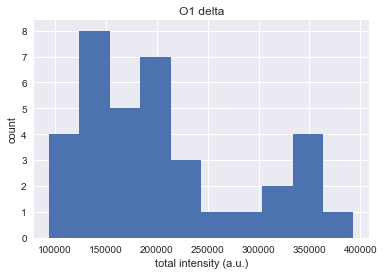

In [420]:
ints1 = extract_intensities(im1, im5)
plt.hist(ints1, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O1 delta')

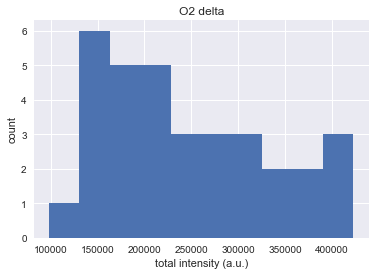

In [421]:
ints2 = extract_intensities(im2, im6)
plt.hist(ints2, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O2 delta')

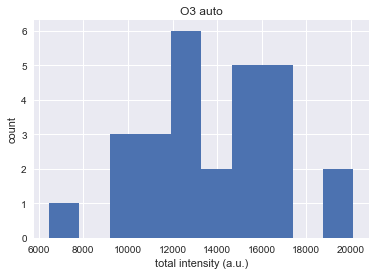

In [422]:
ints3 = extract_intensities(im3, im7)
plt.hist(ints3, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O3 auto')

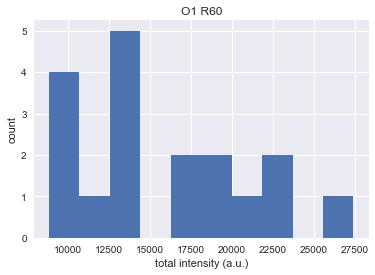

In [423]:
ints4 = extract_intensities(im4, im8)
plt.hist(ints4, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O1 R60')

In [384]:
#Problem 2c
import glob
def strain_totals(op, rep):
    l1 = glob.glob('desktop/bi1/lacI_titration/' + op + '_' + rep + '_' + 'phase*.tif')
    l2 = glob.glob('desktop/bi1/lacI_titration/' + op + '_' + rep + '_' + 'yfp*.tif')
    total = []
    for i in range(len(l1)):
        im1 = skimage.io.imread(l1[i])
        im2 = skimage.io.imread(l2[i])
        l = extract_intensities(im1, im2)
        for e in l:
            total.append(e)
    return total

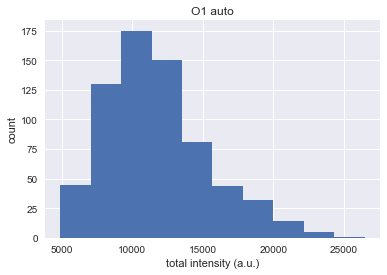

In [424]:
t = strain_totals('O1', 'auto')
plt.hist(t, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O1 auto')

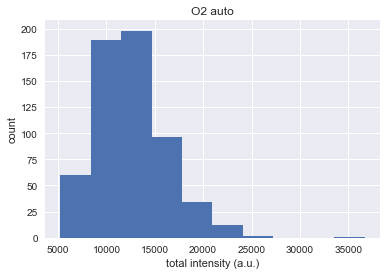

In [425]:
t = strain_totals('O2', 'auto')
plt.hist(t, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O2 auto')

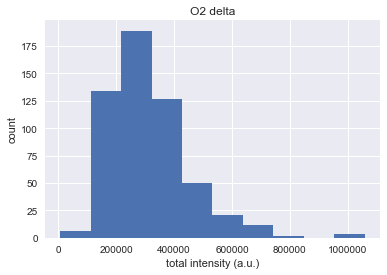

In [426]:
t = strain_totals('O2', 'delta')
plt.hist(t, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O2 delta')

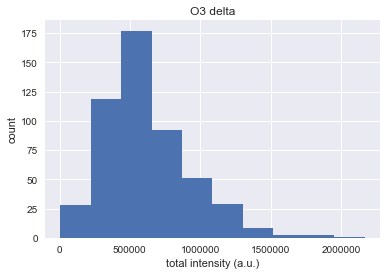

In [427]:
t = strain_totals('O3', 'delta')
plt.hist(t, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')
plt.title('O3 delta')

In [389]:
#Problem 2d
def average(l):
    total = 0
    for i in range(len(l)):
        total += l[i]
    return 1.0 * total / len(l)

def getFoldChanges():
    ops = ['O1', 'O2', 'O3']
    rep_names = ['R22','R60','R124','R260']
    rep_nums = [22, 60, 124, 260]
    results = [[0 for x in range(4)] for y in range(3)]
    for i in range(len(ops)):
        op = ops[i]
        deltas = strain_totals(op, 'delta')
        autos = strain_totals(op, 'auto')
        meanDelta = average(deltas)
        meanAuto = average(autos)
        for j in range(len(rep_names)):
            rep = rep_names[j]
            rs = strain_totals(op, rep)
            meanR = average(rs)
            foldChange = (meanR - meanAuto) / (meanDelta - meanAuto)
            results[i][j] = foldChange
    return results

In [390]:
matrix = getFoldChanges()

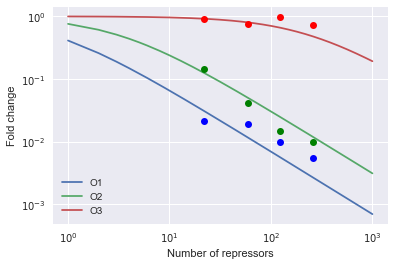

In [391]:
#Problem 2e
plt.plot(steps, O1_vals, '-', label='O1')
plt.plot(steps, O2_vals, '-', label='O2')
plt.plot(steps, O3_vals, '-', label='O3')
plt.plot(rep_nums, matrix[0], 'bo')
plt.plot(rep_nums, matrix[1], 'go')
plt.plot(rep_nums, matrix[2], 'ro')
plt.xlabel('Number of repressors')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Fold change')
plt.legend()

In [428]:
#There are a few reasons as to why there are a few outliers in this data. For one, the segmentation mask algorithm
#we wrote was not perfect. Also, changes in background lighting intensity and the fact that some of the bacteria could
#have died during the experiment could have produced outliers.

In [392]:
#Problem 3b
import scipy.optimize
import pandas as pd

In [393]:
data = pd.read_csv('desktop/bi1/lacZ_titration_data.csv.txt', comment='#')

In [394]:
data.head()

,repressor,fold_change,operator
0,22.42,0.7985,O3
1,59.34,0.6524,O3
2,124.00,0.6210,O3
3,255.30,0.4773,O3
4,22.42,0.1756,O2


In [395]:
data['fold_change']

0     0.798500
1     0.652400
2     0.621000
3     0.477300
4     0.175600
5     0.045190
6     0.021510
7     0.012410
8     0.038860
9     0.008902
10    0.004721
11    0.002774
Name: fold_change, dtype: float64

The best-fit parameter value is -15.51 k_BT


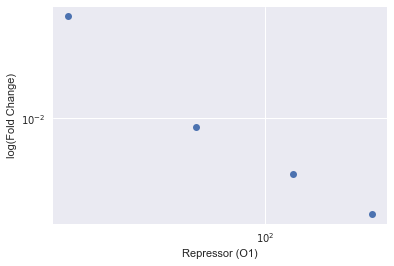

In [396]:
data_O1 = data[data['operator']=='O1']
plt.plot(data_O1['repressor'], data_O1['fold_change'], 'o')
plt.xlabel('Repressor (O1)')
plt.ylabel('log(Fold Change)')
plt.yscale('log')
plt.xscale('log')
p0 = -15
popt, junk = scipy.optimize.curve_fit(FC, data_O1['repressor'], 
                                      data_O1['fold_change'], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

The best-fit parameter value is -13.88 k_BT


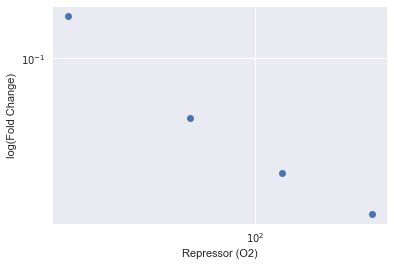

In [397]:
data_O2 = data[data['operator']=='O2']
plt.plot(data_O2['repressor'], data_O2['fold_change'], 'o')
plt.xlabel('Repressor (O2)')
plt.ylabel('log(Fold Change)')
plt.yscale('log')
plt.xscale('log')
p0 = -15
popt, junk = scipy.optimize.curve_fit(FC, data_O2['repressor'], 
                                      data_O2['fold_change'], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

The best-fit parameter value is -10.18 k_BT


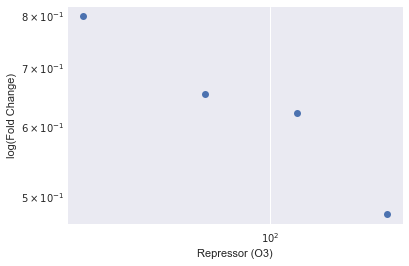

In [398]:
data_O3 = data[data['operator']=='O3']
plt.plot(data_O3['repressor'], data_O3['fold_change'], 'o')
plt.xlabel('Repressor (O3)')
plt.ylabel('log(Fold Change)')
plt.yscale('log')
plt.xscale('log')
p0 = -10
popt, junk = scipy.optimize.curve_fit(FC, data_O3['repressor'], 
                                      data_O3['fold_change'], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

In [399]:
#Overall, the deltaEr values that we obtained here were pretty similar to those obtained by fitting a single 
#point. For the O1 data, the best-fit value was -15.51 K_bT, while the single point value was -15.7 K_bT.
#For the O2 data, the best-fit value was -13.88 K_bT, while the single point value was -14.2 K_bT. 
#For the O3 data, the best-fit value was -10.18 K_bT, while the single point value was -9.87 K_bT. Thus,
#all of the data was within .4 K_bT of the single-point value, which means that there was a pretty good match.

The best-fit parameter value is -15.88 k_BT


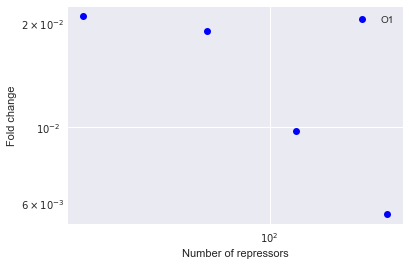

In [400]:
#Problem 3c
plt.plot(rep_nums, matrix[0], 'bo',label='O1')
plt.xlabel('Number of repressors')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Fold change')
plt.legend()
p0 = -15
popt, junk = scipy.optimize.curve_fit(FC, rep_nums, 
                                      matrix[0], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

The best-fit parameter value is -14.09 k_BT


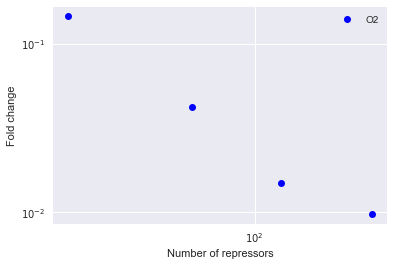

In [401]:
plt.plot(rep_nums, matrix[1], 'bo',label='O2')
plt.xlabel('Number of repressors')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Fold change')
plt.legend()
p0 = -15
popt, junk = scipy.optimize.curve_fit(FC, rep_nums, 
                                      matrix[1], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

The best-fit parameter value is -8.76 k_BT


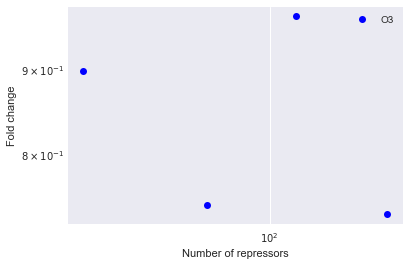

In [402]:
plt.plot(rep_nums, matrix[2], 'bo',label='O3')
plt.xlabel('Number of repressors')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Fold change')
plt.legend()
p0 = -10
popt, junk = scipy.optimize.curve_fit(FC, rep_nums, 
                                      matrix[2], p0=p0)
best_ep = popt[0]
print("The best-fit parameter value is %.2f k_BT" %best_ep)

In [403]:
#The binding energies here are fairly consistent with the data from 3b. However, there are a few large descrepancies of 
#greater than 1 K_bT, which indicates that the same flaws in the data/procedure as there were in 2e (for example, the
#fact that some of the bacteria died during the experiment, imperfections in the mask algorithm, etc.). 

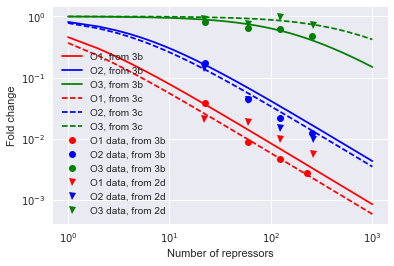

In [404]:
#Problem 3d
O1_vals_A = np.zeros(1000)
O2_vals_A = np.zeros(1000)
O3_vals_A = np.zeros(1000)
O1_vals_B = np.zeros(1000)
O2_vals_B = np.zeros(1000)
O3_vals_B = np.zeros(1000)

for i in range(1, 1001):
    O1_vals_A[i - 1] = FC(i, -15.51)
    O2_vals_A[i - 1] = FC(i, -13.88)
    O3_vals_A[i - 1] = FC(i, -10.18)
    O1_vals_B[i - 1] = FC(i, -15.88)
    O2_vals_B[i - 1] = FC(i, -14.09)
    O3_vals_B[i - 1] = FC(i, -8.76)
    
plt.plot(steps, O1_vals_A, label='O1, from 3b', color='red')
plt.plot(steps, O2_vals_A, label='O2, from 3b', color='blue')
plt.plot(steps, O3_vals_A, label='O3, from 3b', color='green')
plt.plot(steps, O1_vals_B, label='O1, from 3c', color='red', linestyle='--')
plt.plot(steps, O2_vals_B, label='O2, from 3c', color='blue', linestyle='--')
plt.plot(steps, O3_vals_B, label='O3, from 3c', color='green', linestyle='--')
plt.plot(data_O1['repressor'], data_O1['fold_change'], 'ro', label='O1 data, from 3b')
plt.plot(data_O2['repressor'], data_O2['fold_change'], 'bo', label='O2 data, from 3b')
plt.plot(data_O3['repressor'], data_O3['fold_change'], 'go', label='O3 data, from 3b')
plt.plot(rep_nums, matrix[0], 'ro', marker = 'v', label='O1 data, from 2d')
plt.plot(rep_nums, matrix[1], 'bo', marker = 'v', label='O2 data, from 2d')
plt.plot(rep_nums, matrix[2], 'go', marker = 'v', label='O3 data, from 2d')
plt.xlabel('Number of repressors')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Fold change')
plt.legend()

In [ ]:
#Overall, we see a general agreement in at least the shapes of the different curves, although not necessarily in the
#actual values, particulalry in the O3 data set. The descrepancies between the curves of the same data set are flaws
#in the data, not in the theory, for the same reasons discussed above. 